# About the data set (Heart disease data)¶
The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile.
Attribute information:

male: Gender of patient: male(1) or female(0)

age: Age of patient

education: Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

currentSmoker: Whether the patient is a smoker now: Yes(1) or No(0)

cigsPerDay: Average number of cigarettes smoked by patient per day

BPMeds: Whether the patient is on blood pressure medications: Yes(1) or No(0)

prevalentStroke: If the patient has a history of heart stroke: Yes(1) or No(0)

prevalentHyp: If the patient has a history of hypertension: Yes(1) or No(0)

diabetes: If the patient has a diabetes: Yes(1) or No(0)

totChol: Average cholesterol levels in mg/dL

sysBP: Average systolic blood pressure of patient

diaBP: Average diastolic blood pressure of patient

BMI: BMI of patient

heartRate: Avergae heartrate of patient

glucose: Average blood glucose levels of patient

CVD: Does the patient have cardiovascular disease: Yes(1) or No(0)

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
data=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\supervised learning classification\inclass\SLC_Inclass_Day1-2\SLC_Inclass_Day1\Heart_disease.csv")

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Exploratory data analysis
* data discription
* drop the duplicates
* univariate analysis
* bivariate analysis
* missing value treatment
* outliers treatment
* encoding 


#### data discription 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
#converting data type of feature into object
df=data
l=['male','age','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for i in l:
    df[i]=df[i].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   object 
 2   education        4135 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(7), int64(1), object(8)
memory usage: 530.1+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.354599,22.033300,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.897759,11.910394,48.00,75.00,82.0,90.00,142.5
BMI,4221.0,25.800801,4.079840,15.54,23.07,25.4,28.04,56.8
heartRate,4239.0,75.878981,12.025348,44.00,68.00,75.0,83.00,143.0
glucose,3852.0,81.963655,23.954335,40.00,71.00,78.0,87.00,394.0
CVD,4240.0,0.151887,0.358953,0.00,0.00,0.0,0.00,1.0


In [9]:
data.shape

(4240, 16)

#### checking the duplicated values

In [10]:
df[df.duplicated()]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD


#### univariate analysis

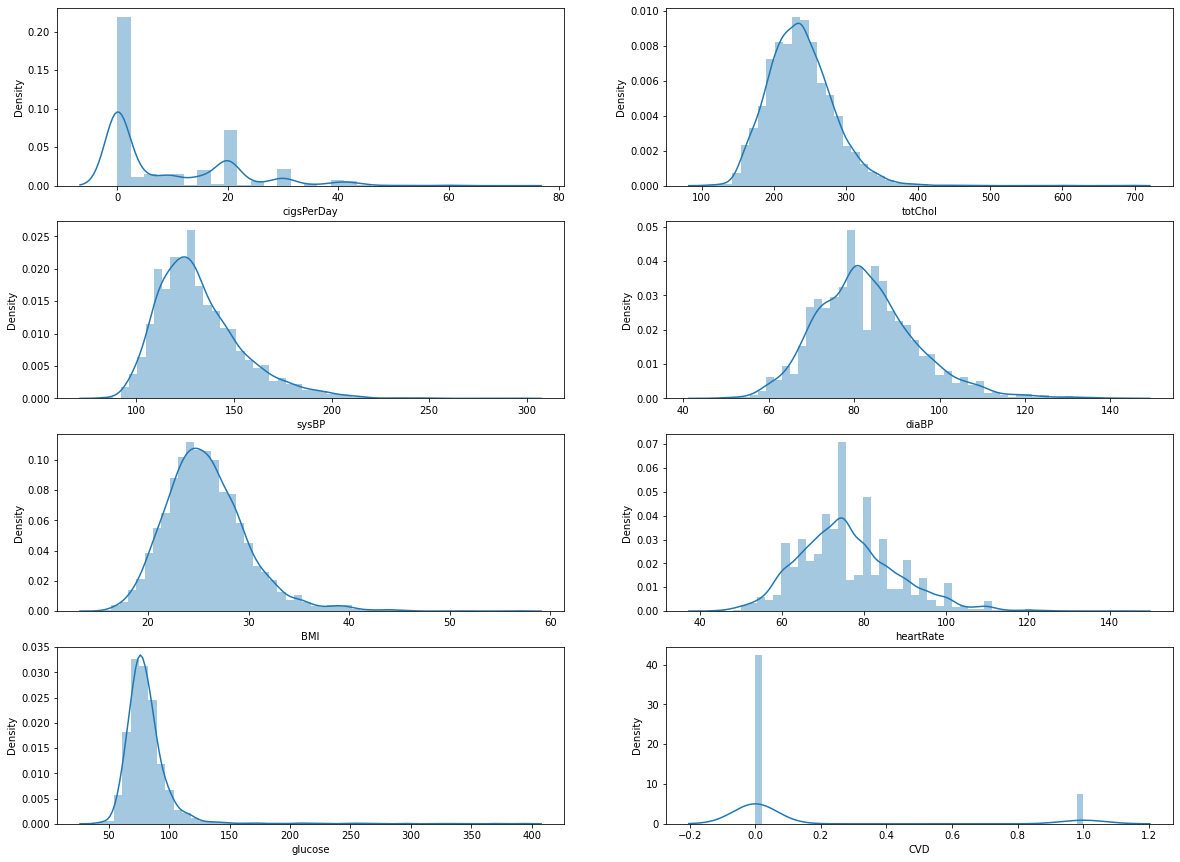

In [11]:
num_col=df.select_dtypes(include=np.number).columns
t=1
plt.figure(figsize=[20,15])
for i in num_col:
    plt.subplot(4,2,t)
    sns.distplot(df[i])
    t=t+1
plt.show()

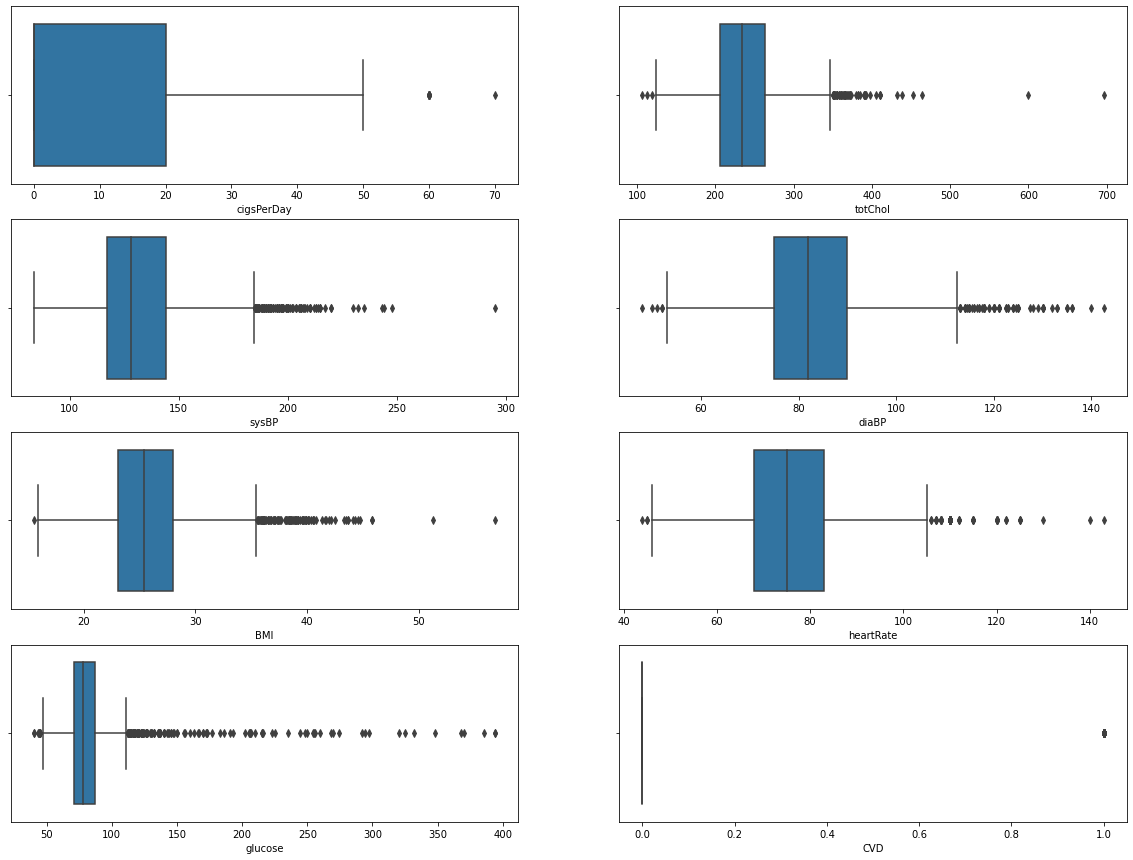

In [12]:
t=1
plt.figure(figsize=[20,15])
for i in num_col:
    plt.subplot(4,2,t)
    sns.boxplot(df[i])
    t=t+1
plt.show()

#### univariate inference of numerical columns
* 1) most of patients don't smoke about 50% 
* 2) most of patients cholesterol of patient lie between 200-280 and outliers present in the feature
* 3) systolic blood pressure lie between 110-150 and outliers present in the feature
* 4) diastolic blood pressure lie between 110-150 and outliers present in the feature
* 5) most of patients bmi between 24-28 and outliers present in the feature
* 6) most of patients average heart rate lies between 70 to 85
* 7) huge outliers present in the average blood glusose feature
* 8) dataset is highly imbalance

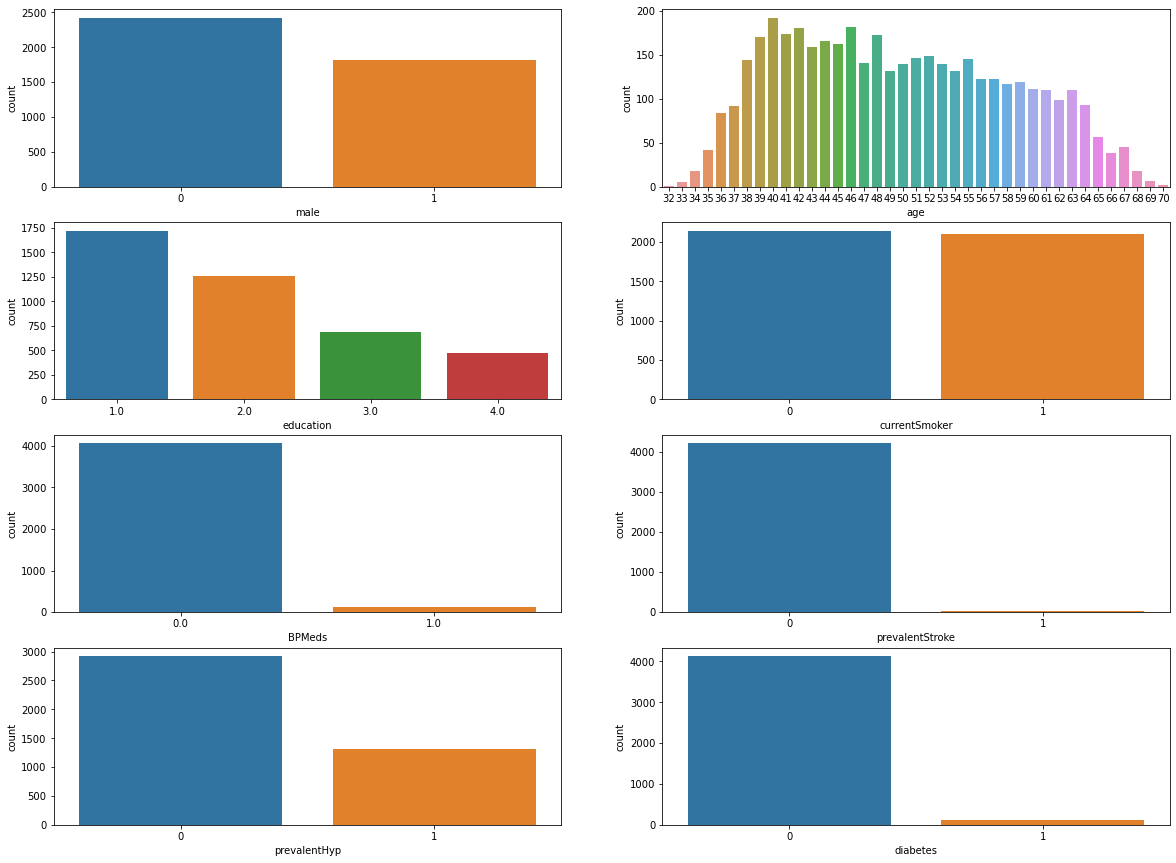

In [13]:
cat_col=df.select_dtypes(include=np.object).columns
t=1
plt.figure(figsize=[20,15])
for i in cat_col:
    plt.subplot(4,2,t)
    sns.countplot(df[i])
    t=t+1
plt.show()

#### univariate inference of categorical columns
* female pateints are more as compare to male
* most of patients education level is some high school and diploma
* counts of smokers are fairly equal
* most of patients dont have a medication of blood pressure
* most of patients dont have a medication of blood pressure
* most of patients dont have a history of heart stroke
* about 3/4th of patients dont have a history of hypertension
* patients  don't have diabetes history



In [14]:
####

In [15]:
############# bivariate analysis

In [16]:
####

### Missing value treatment

In [17]:
df.isnull().sum()/len(df)*100
#hence of most of missing value lie under 10% and these values can be filled by median and mode

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
CVD                0.000000
dtype: float64

In [18]:
for i in num_col:
    df.loc[df[i].isnull(),i]=df[i].median()

In [19]:
for i in cat_col:
    df.loc[df[i].isnull(),i]=df[i].mode()[0]

In [20]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

### Outliers treatment 

In [21]:
num_col=['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose']


In [22]:

# for i in num_col:
#     q1=df[i].quantile(0.25)
#     q3=df[i].quantile(0.75)
#     iqr=q3-q1
#     ul=q3+1.5*iqr
#     ll=q1-1.5*iqr
#     df.loc[df[i]>ul,i]=ul
#     df.loc[df[i]<ll,i]=ll

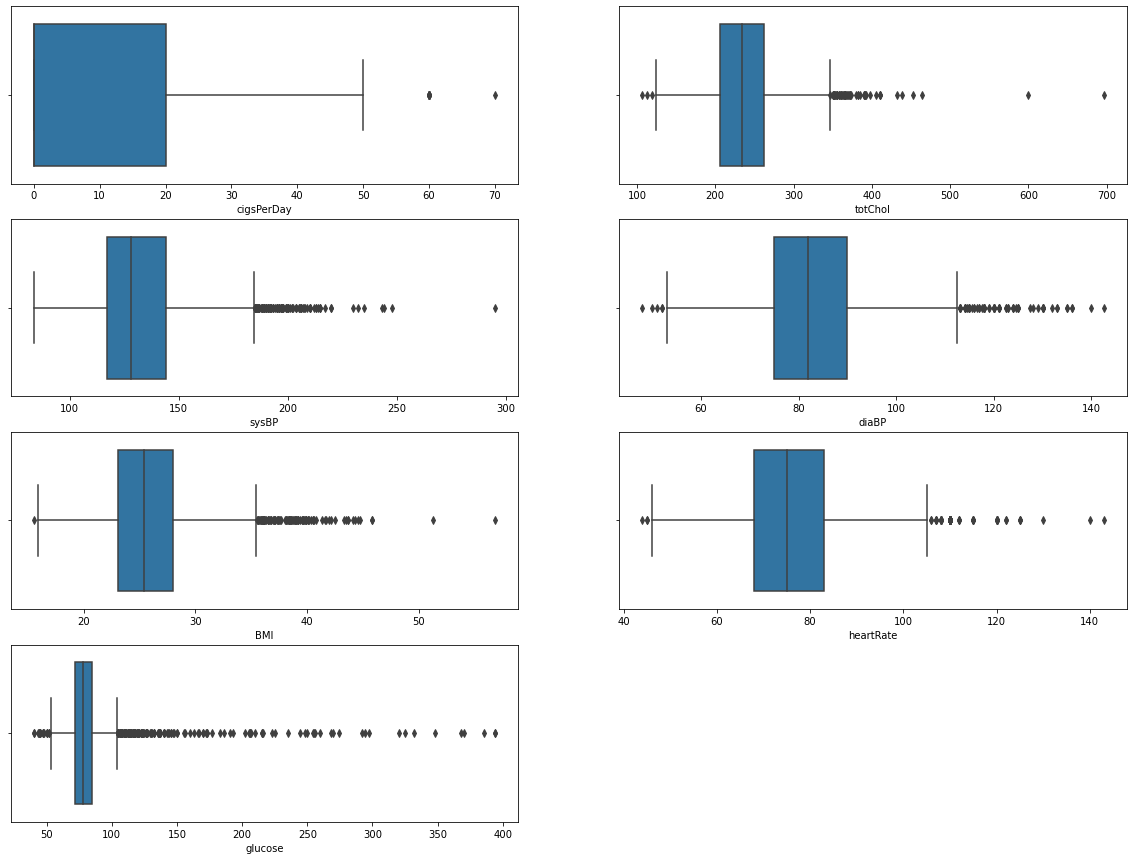

In [23]:
t=1
plt.figure(figsize=[20,15])
for i in num_col:
    plt.subplot(4,2,t)
    sns.boxplot(df[i])
    t=t+1
plt.show()

In [24]:
# changing the datatype of the feature into numerical for machine learning

In [25]:
for i in cat_col:
    df[i]=df[i].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int32  
 1   age              4240 non-null   int32  
 2   education        4240 non-null   int32  
 3   currentSmoker    4240 non-null   int32  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   int32  
 6   prevalentStroke  4240 non-null   int32  
 7   prevalentHyp     4240 non-null   int32  
 8   diabetes         4240 non-null   int32  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(7), int32(8), int64(1)
memory usage: 397.6 KB


In [27]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# num_col
# for i in num_col:
#     df.loc[:,i]=ss.fit_transform(pd.DataFrame(df.loc[:,i]))

In [29]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Modelling

In [30]:
## spliting the data into train test split

In [31]:
X=df.drop('CVD',axis=1)
y=df.CVD
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((2968, 15), (1272, 15), (2968,), (1272,))

In [33]:
import statsmodels.api as sma
x_train=sma.add_constant(x_train)
x_test=sma.add_constant(x_test)

In [34]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_train_os,y_train_os=s.fit_resample(x_train,y_train)

### 1) logistic regression model

In [35]:
import statsmodels.api as sma
model_lr=sma.Logit(y_train,x_train).fit()
model_lr.summary()

Optimization terminated successfully.
         Current function value: 0.379261
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2952
Method:                           MLE   Df Model:                           15
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                  0.1099
Time:                        12:49:11   Log-Likelihood:                -1125.6
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                 2.107e-50
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0643      0.799    -10.093      0.000      -9.630      -6.498
male                0.5516      0.120      4.586      0.000       0.316       0.787
age                 0.0601      0.007      8.168      0.000       0.046       0.075
education          -0.0193      0.055     -0.348      0.728      -0.128       0.089
currentSmoker       0.0402      0.171      0.236      0.814      -0.294       0.374
cigsPerDay          0.0218      0.007      3.242      0.001       0.009       0.035
BPMeds              0.5275      0.247      2.139      0.032       0.044       1.011
prevalentStroke     0.5070      0.521      0.972      0.331      -0.515       1.529
prevalentHyp        0.2384      0.154      1.549      0.121      -0.063       0.540
diabetes           -0.0375      0.357     -0.105      0.916      -0.736       0.661
totChol             0.0022      0.001      1.808      0.071      -0.000       0.005
sysBP               0.0136      0.004      3.234      0.001       0.005       0.022
diaBP              -0.0065      0.007     -0.922      0.357      -0.020       0.007
BMI                 0.0156      0.014      1.118      0.264      -0.012       0.043
heartRate          -0.0025      0.005     -0.531      0.596      -0.012       0.007
glucose             0.0073      0.003      2.905      0.004       0.002       0.012
===================================================================================
"""

In [36]:
l=['education','currentSmoker','prevalentStroke','prevalentHyp','diabetes','diaBP','BMI','heartRate']

In [37]:
import statsmodels.api as sma
model_lr=sma.Logit(y_train,x_train.drop(l,axis=1)).fit()
model_lr.summary()

Optimization terminated successfully.
         Current function value: 0.380231
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2960
Method:                           MLE   Df Model:                            7
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                  0.1076
Time:                        12:49:11   Log-Likelihood:                -1128.5
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                 5.215e-55
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5773      0.528    -16.240      0.000      -9.612      -7.542
male           0.5649      0.117      4.809      0.000       0.335       0.795
age            0.0623      0.007      8.851      0.000       0.048       0.076
cigsPerDay     0.0221      0.005      4.837      0.000       0.013       0.031
BPMeds         0.6199      0.243      2.552      0.011       0.144       1.096
totChol        0.0022      0.001      1.798      0.072      -0.000       0.005
sysBP          0.0147      0.002      5.970      0.000       0.010       0.020
glucose        0.0072      0.002      3.869      0.000       0.004       0.011
==============================================================================
"""

In [38]:
y_pred=model_lr.predict(x_test)
y_pred_=[0 if x<0.5 else 1 for x in y_pred]


ValueError: shapes (1272,16) and (8,) not aligned: 16 (dim 1) != 8 (dim 0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred_))

In [ ]:
# using the oversampled data

In [ ]:
x_test.head()

In [ ]:
x_train_os.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_os,y_train_os)
y_pred_lr=lr.predict(x_test)

In [ ]:
y_pred_lr

In [ ]:
print(classification_report(y_test,y_pred_lr))

### 2) KNN model

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_os,y_train_os)
y_pred_knn=knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75      1079
           1       0.20      0.48      0.28       193

    accuracy                           0.63      1272
   macro avg       0.54      0.57      0.52      1272
weighted avg       0.77      0.63      0.68      1272



### 3) NaiveBayes

In [148]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_os,y_train_os)
y_pred_nb=nb.predict(x_test)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1079
           1       0.26      0.45      0.33       193

    accuracy                           0.72      1272
   macro avg       0.57      0.61      0.58      1272
weighted avg       0.79      0.72      0.75      1272



### 4) decision tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_os,y_train_os)
y_pred_dt=dt.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1079
           1       0.21      0.33      0.25       193

    accuracy                           0.70      1272
   macro avg       0.54      0.55      0.53      1272
weighted avg       0.77      0.70      0.73      1272



In [150]:
confusion_matrix(y_test,y_pred_dt)

array([[832, 247],
       [129,  64]], dtype=int64)

In [151]:
#using grid search cv
from sklearn.model_selection import GridSearchCV
param={'max_depth':[3,4,5,6,7],'max_features':[12,13,14],'criterion':['entropy']}
gscv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,scoring='recall',cv=3,verbose=3)
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END criterion=entropy, max_depth=3, max_features=12;, score=0.876 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=12;, score=0.760 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=12;, score=0.828 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=13;, score=0.847 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=13;, score=0.790 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=13;, score=0.821 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=14;, score=0.853 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=14;, score=0.833 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=14;, score=0.791 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=12;, score=0.826 total time=   0.0s

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [12, 13, 14]},
             scoring='recall', verbose=3)

In [152]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 14}

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**gscv.best_params_)
dt.fit(x_train_os,y_train_os)
y_pred_dt=dt.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1079
           1       0.24      0.55      0.34       193

    accuracy                           0.67      1272
   macro avg       0.57      0.62      0.56      1272
weighted avg       0.80      0.67      0.71      1272



In [51]:
confusion_matrix(y_test,y_pred_dt)

array([[811, 268],
       [ 99,  94]], dtype=int64)

### 5) Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train_os,y_train_os)
y_pred_rf=rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1079
           1       0.29      0.26      0.28       193

    accuracy                           0.79      1272
   macro avg       0.58      0.57      0.58      1272
weighted avg       0.78      0.79      0.79      1272



In [53]:
#using grid search cv
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[400,600,700,1000,1200],'max_depth':[4,5,6,7,8],'criterion':['entropy']}
gscv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,scoring='recall',cv=3,verbose=3)
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=400;, score=0.665 total time=   1.3s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=400;, score=0.762 total time=   1.2s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=400;, score=0.722 total time=   1.1s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.670 total time=   1.8s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.744 total time=   2.0s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.721 total time=   2.5s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.663 total time=   2.8s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.733 total time=   2.1s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.720 total time=   2.0s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=1000;, score=0.658 total t

KeyboardInterrupt: 

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(**gscv.best_params_)
rf.fit(x_train_os,y_train_os)
y_pred_rf=rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.58      0.72      1079
           1       0.24      0.72      0.35       193

    accuracy                           0.60      1272
   macro avg       0.58      0.65      0.53      1272
weighted avg       0.82      0.60      0.66      1272



### 6) XGboost

In [161]:
from xgboost import XGBClassifier

In [162]:
xgb=XGBClassifier(n_estimators=200,max_depth=5)
xgb.fit(x_train_os,y_train_os)
y_pred_xgb=xgb.predict(x_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1079
           1       0.29      0.18      0.22       193

    accuracy                           0.81      1272
   macro avg       0.58      0.55      0.56      1272
weighted avg       0.78      0.81      0.79      1272



In [163]:
#using grid search cv
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[400,600,700],'max_depth':[4,5,6,7,8]}
gscv=GridSearchCV(estimator=XGBClassifier(),param_grid=param,scoring='f1',cv=3,verbose=3)
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END .....max_depth=4, n_estimators=400;, score=0.654 total time=   0.8s
[CV 2/3] END .....max_depth=4, n_estimators=400;, score=0.914 total time=   0.7s
[CV 3/3] END .....max_depth=4, n_estimators=400;, score=0.909 total time=   0.7s
[CV 1/3] END .....max_depth=4, n_estimators=600;, score=0.660 total time=   1.1s
[CV 2/3] END .....max_depth=4, n_estimators=600;, score=0.914 total time=   1.0s
[CV 3/3] END .....max_depth=4, n_estimators=600;, score=0.905 total time=   1.0s
[CV 1/3] END .....max_depth=4, n_estimators=700;, score=0.661 total time=   1.2s
[CV 2/3] END .....max_depth=4, n_estimators=700;, score=0.913 total time=   1.2s
[CV 3/3] END .....max_depth=4, n_estimators=700;, score=0.905 total time=   1.2s
[CV 1/3] END .....max_depth=5, n_estimators=400;, score=0.671 total time=   0.8s
[CV 2/3] END .....max_depth=5, n_estimators=400;, score=0.917 total time=   1.0s
[CV 3/3] END .....max_depth=5, n_estimators=400;

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [400, 600, 700]},
             scoring='f1', verbose=3)

In [ ]:
xgb=XGBClassifier(**gscv.best_params_)
xgb.fit(x_train_os,y_train_os)
y_pred_xgb=xgb.predict(x_test)
print(classification_report(y_test,y_pred_xgb))

In [154]:
from sklearn.metrics import cohen_kappa_score

In [155]:
print(cohen_kappa_score(y_test,y_pred_lr))
print(cohen_kappa_score(y_test,y_pred_dt))
print(cohen_kappa_score(y_test,y_pred_knn))
print(cohen_kappa_score(y_test,y_pred_nb))
print(cohen_kappa_score(y_test,y_pred_rf))


0.1290367792195657
0.16029310523685125
0.08755406640268049
0.16672660946411144
0.15396879172562228


In [39]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Balanced random forest

In [42]:
from sklearn.metrics import classification_report

In [43]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier(n_estimators=900)
model_brf=brf.fit(x_train,y_train)    #giving data where smote is not applied
y_pred_rf=model_brf.predict(x_test)
classification_report(y_test,y_pred_rf)
#roc(y_test,model_brf.predict_proba(x_test)[:,1])

'              precision    recall  f1-score   support\n\n           0       0.91      0.67      0.77      1079\n           1       0.26      0.64      0.37       193\n\n    accuracy                           0.66      1272\n   macro avg       0.58      0.65      0.57      1272\nweighted avg       0.81      0.66      0.71      1272\n'

In [44]:
print(classification_report(y_test,y_pred_rf)
)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1079
           1       0.26      0.64      0.37       193

    accuracy                           0.66      1272
   macro avg       0.58      0.65      0.57      1272
weighted avg       0.81      0.66      0.71      1272



In [ ]:
# hence from above models balanced random forest modell work best with recall of 0.64 and accuracy of 0.66 